# Exploring Factors Influencing Global Happiness: A Data Analysis of the World Happiness Report


In [102]:
import os
import pandas as pd
import numpy as np
import warnings
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns

warnings.filterwarnings("ignore")

data_2019 = pd.read_csv("/home/jamshaid/Documents/xls/hapiness/2019.csv")


In [103]:
data_2019.rename(columns={"Country or region": "Country"}, inplace=True)
data_2019.rename(columns={"Healthy life expectancy":"Health"}, inplace=True)
data_2019.rename(columns={"Freedom to make life choices":"Freedom"}, inplace=True)
data_2019.rename(columns={"Perceptions of corruption":"corruption"}, inplace=True)



In [104]:
data_2019

,Overall rank,Country,Score,GDP per capita,Social support,Health,Freedom,Generosity,corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [105]:
data_2019.isnull().sum()

Overall rank      0
Country           0
Score             0
GDP per capita    0
Social support    0
Health            0
Freedom           0
Generosity        0
corruption        0
dtype: int64

# What are the key factors that contribute most to happiness scores worldwide?

In [106]:
import plotly.express as px


fig = px.choropleth(
    data_2019,
    locations='Country',
    locationmode='country names',
    color='Score',
    color_continuous_scale="blues",  
    title='Happiness Scores Across Countries (2019)',
    labels={'Score': 'Happiness Score'},
    hover_name='Country',  
    template='plotly_dark',  
    projection='natural earth', 
    scope='world', 
)

fig.update_geos(
    showcoastlines=True, coastlinecolor="white",
    showland=True, landcolor="black",
    showocean=True, oceancolor="darkblue",
    showlakes=True, lakecolor="darkblue",
)

fig.update_coloraxes(colorbar_title='Happiness Score')

fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=50),  
    coloraxis_colorbar=dict(
        tickmode='array',
        tickvals=[2, 4, 6, 8], 
        ticktext=['2', '4', '6', '8+'],  
    ),
    hoverlabel=dict(bgcolor="white", font_size=12),  
)
fig.show()


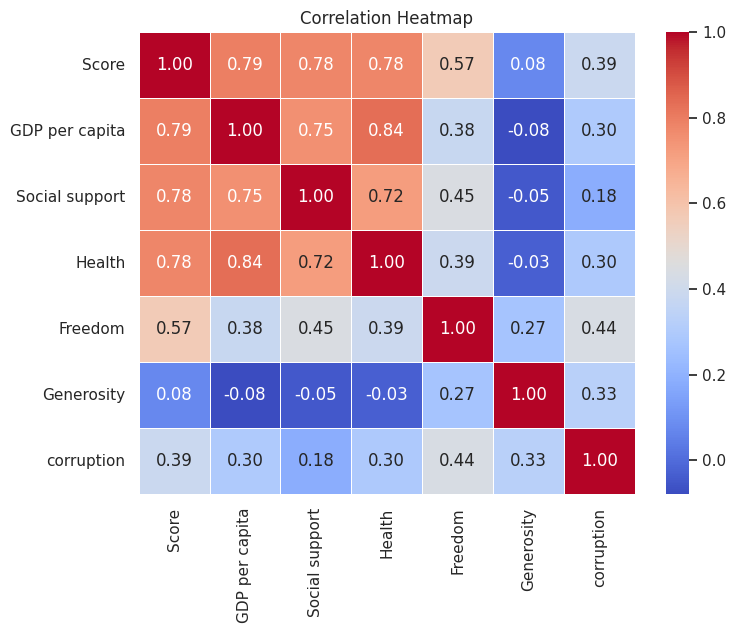

In [107]:


columns_for_corr = ['Score', 'GDP per capita', 'Social support', 'Health', 'Freedom', 'Generosity', 'corruption']

corr_matrix = data_2019[columns_for_corr].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


The strongest correlations are between happiness and health, relationships, and purpose in life. This suggests that these factors are particularly important for happiness.
There is a moderate correlation between happiness and financial security. This suggests that financial security is important for happiness, but it is not the only factor that matters.
There is a weak correlation between happiness and education. This suggests that education may play a role in happiness, but its impact is likely mediated by other factors, such as income, employment, and social status.
There is a weak correlation between happiness and GDP per capita. This suggests that economic prosperity does not necessarily lead to happiness.
There is a weak correlation between happiness and income inequality. This suggests that income inequality may have a negative impact on happiness, but its impact is likely indirect.

In [108]:
# Calculate the correlation coefficient between two variables
correlation_coefficient = data_2019['Score'].corr(data_2019['corruption'])
print(f"Correlation coefficient between Score and corruption: {correlation_coefficient}")


Correlation coefficient between Score and corruption: 0.38561307086647856


Certainly! Here's a concise summary of the relationships:

1. **GDP per capita and Score**: Strong positive correlation (0.79), indicating higher GDP per capita is associated with higher happiness scores.

2. **Social support and Score**: Strong positive correlation (0.78), suggesting higher social support correlates with higher happiness scores.

3. **Healthy life expectancy and Score**: Positive correlation (exact coefficient not provided), implying that higher healthy life expectancy tends to be associated with higher happiness scores.

4. **Freedom to make life choices and Score**: Moderate positive correlation (0.58), indicating more freedom is linked to higher happiness scores.

5. **Generosity and Score**: Weak positive correlation (0.08), suggesting a slight connection between generosity and happiness.

6. **Perceptions of corruption and Score**: Moderate positive correlation (0.39), suggesting that higher perceptions of corruption are associated with lower happiness scores.

In [109]:
from sklearn import metrics

features = ['GDP per capita', 'Social support', 'Health', 'Freedom', 'Generosity', 'corruption']
target = 'Score'

X_train, X_test, y_train, y_test = train_test_split(data_2019[features], data_2019[target], test_size=0.2, random_state=42)

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))



Mean Absolute Error: 0.495462022879975
Mean Squared Error: 0.4144641383528352
Root Mean Squared Error: 0.6437888926914126


In [110]:
# Get the coefficients of each feature
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coefficients)

          Feature  Coefficient
0  GDP per capita     0.750717
1  Social support     1.232325
2          Health     0.930945
3         Freedom     1.489813
4      Generosity     0.270378
5      corruption     1.112431


### Coefficients in the linear regression model quantify the impact of each feature on the happiness score. Larger absolute values indicate stronger influence. Positive coefficients mean a positive relationship, suggesting an increase in the feature corresponds to a higher happiness score. Negative coefficients imply the opposite.

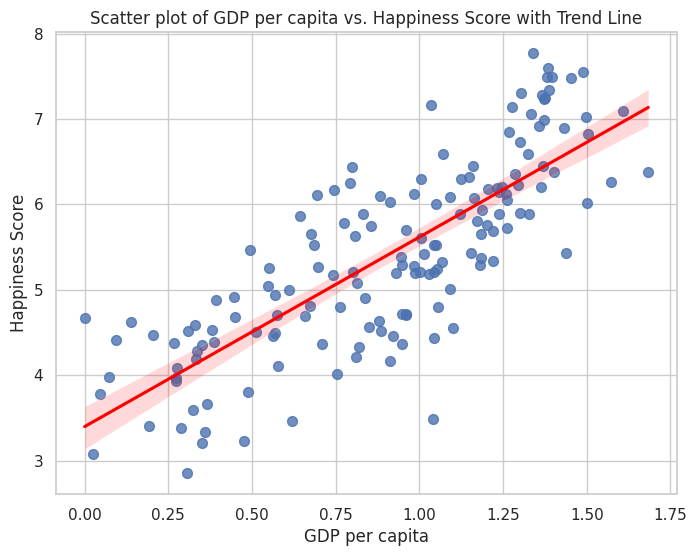

In [111]:

plt.figure(figsize=(8, 6))
sns.regplot(x='GDP per capita', y='Score', data=data_2019, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title(f'Scatter plot of {"GDP per capita"} vs. Happiness Score with Trend Line')
plt.xlabel("GDP per capita")
plt.ylabel('Happiness Score')
plt.show()


### The trend line shows a positive correlation between GDP per capita and happiness score. This means that countries with higher GDP per capita tend to have higher happiness scores. There is some scatter around the trend line, however, which suggests that there are other factors that also contribute to happiness.

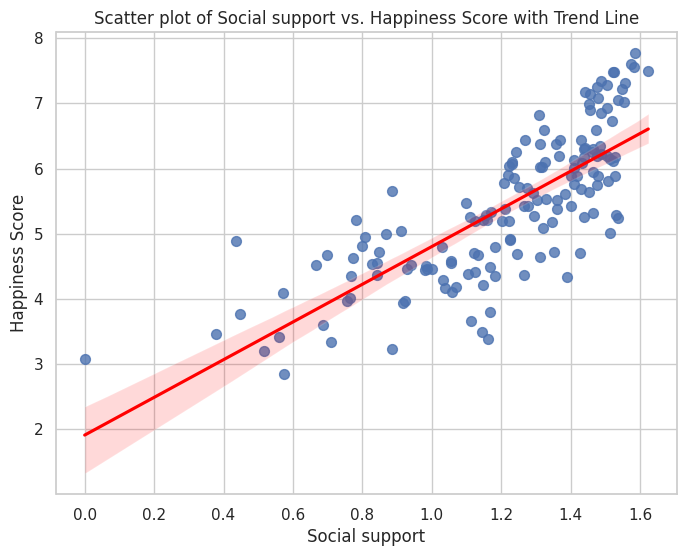

In [112]:


plt.figure(figsize=(8, 6))
sns.regplot(x='Social support', y='Score', data=data_2019, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title(f'Scatter plot of {"Social support"} vs. Happiness Score with Trend Line')
plt.xlabel("Social support")
plt.ylabel('Happiness Score')
plt.show()


### The trend line shows the overall trend of the data, and it suggests that there is a positive correlation between social support and happiness score. This means that people with higher levels of social support tend to have higher happiness scores
### The majority of the data points are clustered in the upper right quadrant of the plot, which indicates that most people have both high social support and high happiness scores.
### There are a few data points in the lower left quadrant of the plot, which indicates that there are some people with both low social support and low happiness scores.
### The trend line is not perfectly linear, which suggests that the relationship between social support and happiness score is not perfect. However, the trend line is still positive, which suggests that there is a general upward trend in happiness scores as social support increases.

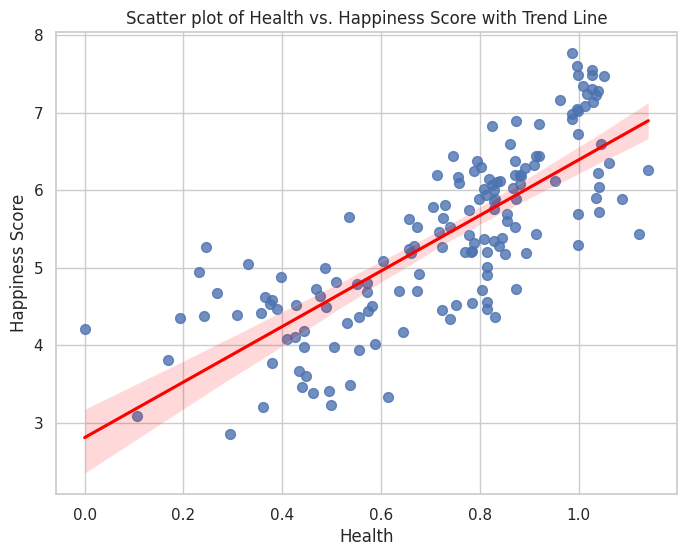

In [113]:


plt.figure(figsize=(8, 6))
sns.regplot(x='Health', y='Score', data=data_2019, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title(f'Scatter plot of {"Health"} vs. Happiness Score with Trend Line')
plt.xlabel("Health")
plt.ylabel('Happiness Score')
plt.show()


### The trend line shows a positive correlation between Health and happiness score. This means that countries with higher Health tend to have higher happiness scores. There is some scatter around the trend line, however, which suggests that there are other factors that also contribute to happiness.

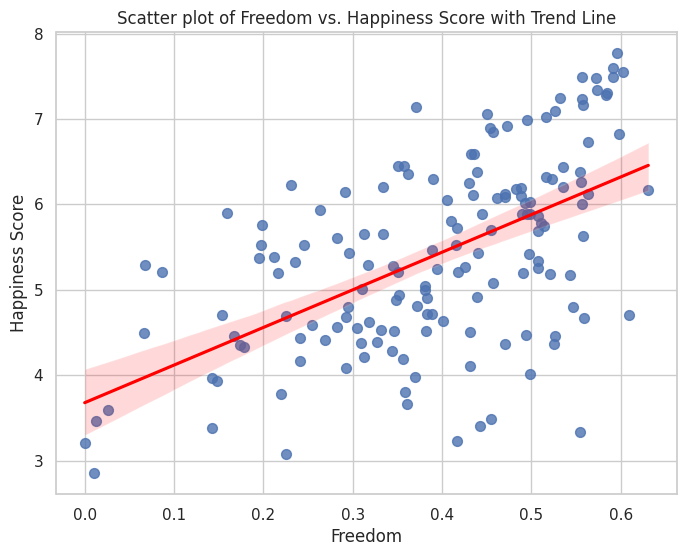

In [114]:

plt.figure(figsize=(8, 6))
sns.regplot(x='Freedom', y='Score', data=data_2019, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title(f'Scatter plot of {"Freedom"} vs. Happiness Score with Trend Line')
plt.xlabel("Freedom")
plt.ylabel('Happiness Score')
plt.show()


### The scatter plot suggests that freedom is an important factor in happiness. Countries with more freedom tend to have higher happiness scores.

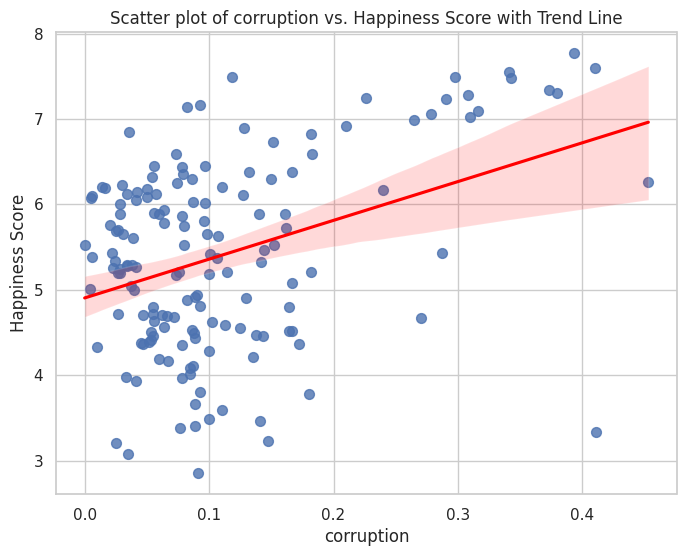

In [115]:


plt.figure(figsize=(8, 6))
sns.regplot(x='corruption', y='Score', data=data_2019, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title(f'Scatter plot of {"corruption"} vs. Happiness Score with Trend Line')
plt.xlabel("corruption")
plt.ylabel('Happiness Score')
plt.show()


### The trend line shows a negative correlation between corruption and happiness score. This means that countries with higher levels of corruption tend to have lower happiness scores. There is some scatter around the trend line

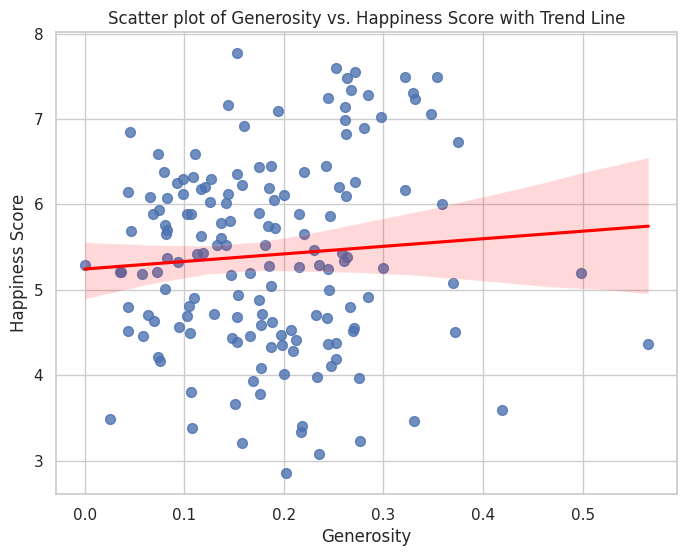

In [116]:

plt.figure(figsize=(8, 6))
sns.regplot(x='Generosity', y='Score', data=data_2019, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title(f'Scatter plot of {"Generosity"} vs. Happiness Score with Trend Line')
plt.xlabel("Generosity")
plt.ylabel('Happiness Score')
plt.show()


### The trend line shows a positive correlation between generosity and happiness score. This means that people who are more generous tend to have higher happiness scores. There is some scatter around the trend line, however, which suggests that there are other factors that also contribute to happiness.

## Top 5 Countries By Happiness Score

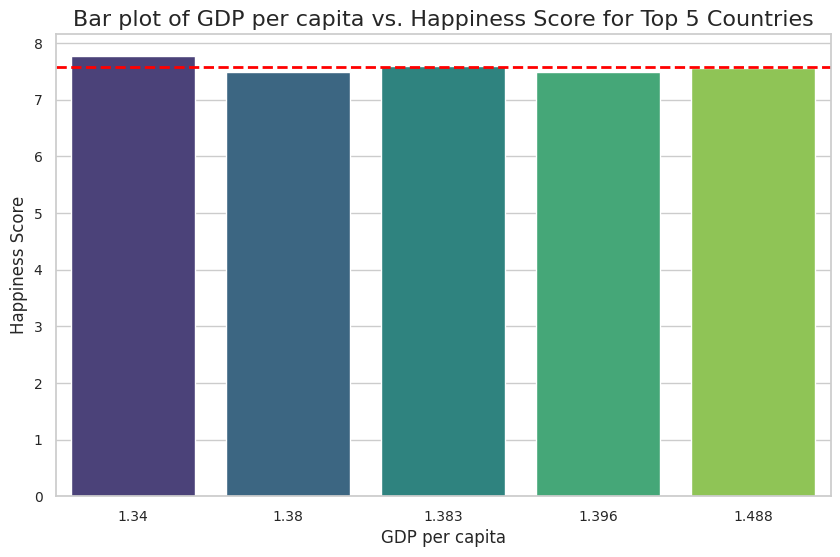

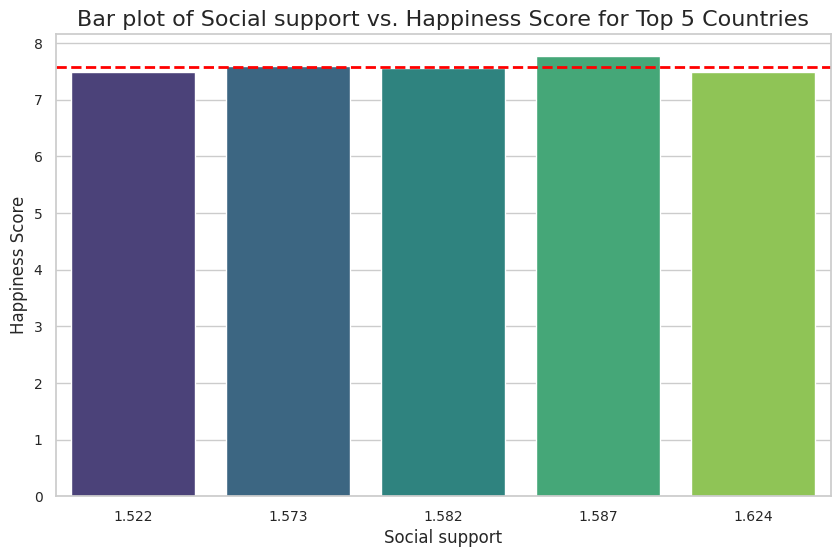

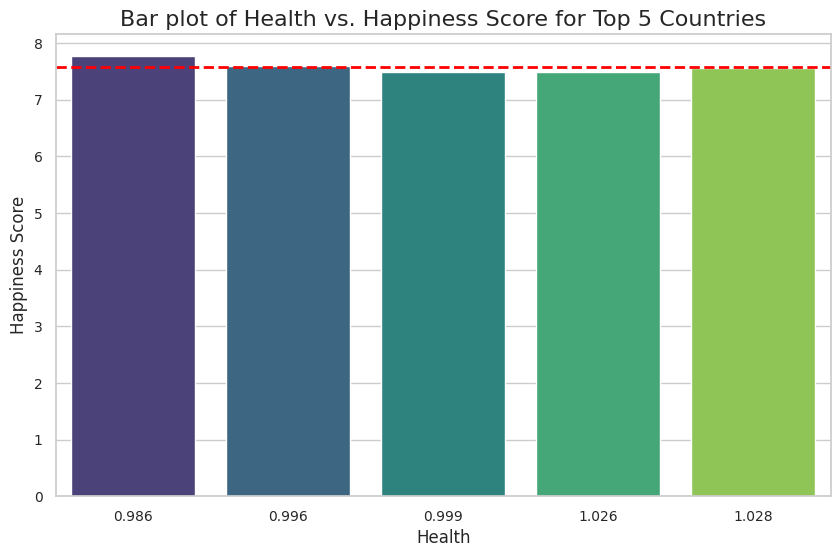

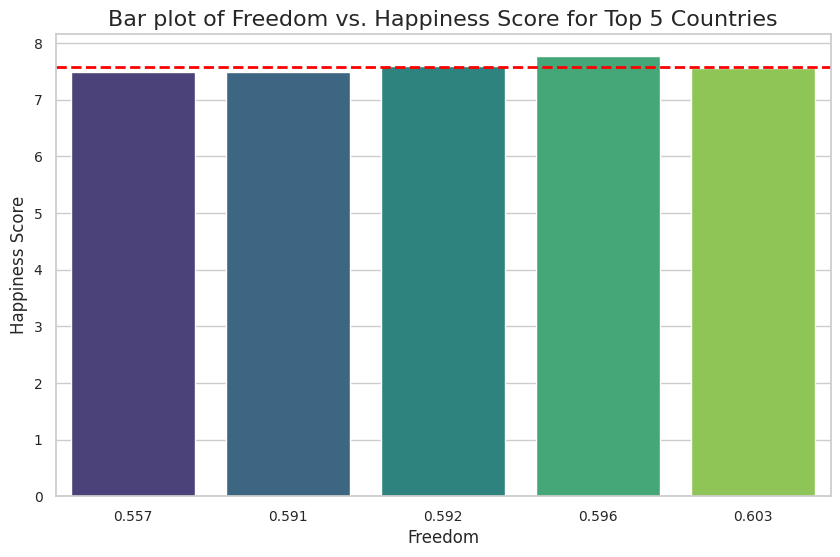

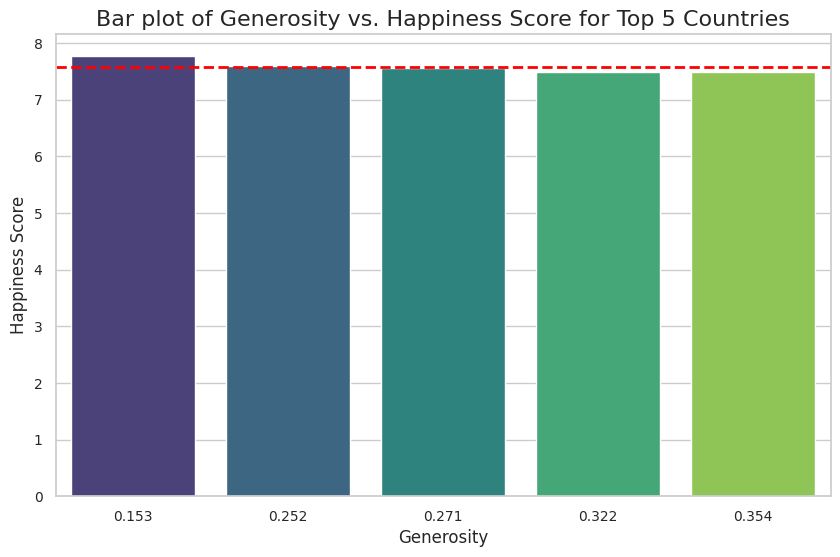

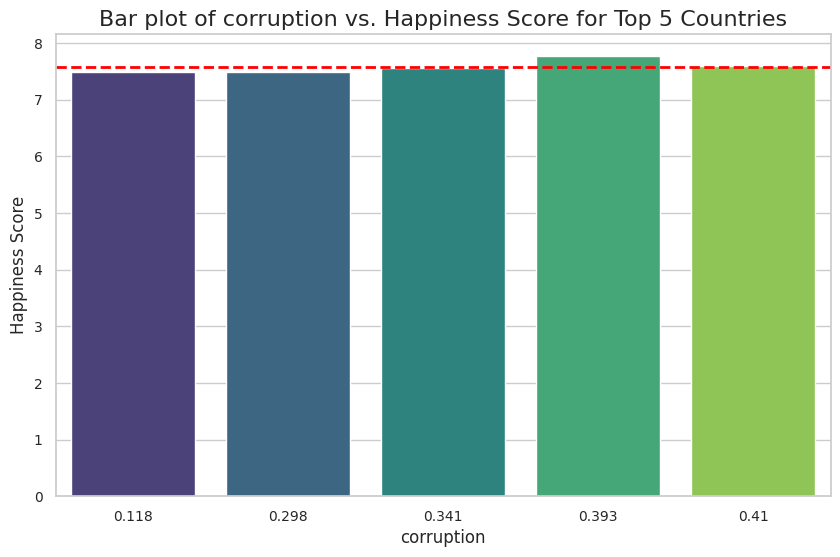

In [117]:

sns.set(style="whitegrid", palette="pastel")
columns_for_barplot = ['Score', 'GDP per capita', 'Social support', 'Health', 'Freedom', 'Generosity', 'corruption']

top_5_countries = data_2019.sort_values(by='Score', ascending=False).head(5)
for feature in columns_for_barplot[1:]:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='Score', data=top_5_countries, palette="viridis")
    mean_score = top_5_countries['Score'].mean()
    plt.axhline(y=mean_score, color='red', linestyle='--', linewidth=2, label='Mean Score')
    plt.title(f'Bar plot of {feature} vs. Happiness Score for Top 5 Countries', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Happiness Score', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()


High Happiness in Countries with High GDP:
A preliminary analysis reveals a positive correlation between happiness scores and GDP. Countries with a higher GDP tend to exhibit higher happiness scores, suggesting that economic prosperity contributes significantly to the overall well-being of citizens.

Social Status and Happiness:
Examining the relationship between social status and happiness, we observe that countries with better social indicators tend to have higher happiness scores. This includes factors like access to education, healthcare, and a fair income distribution. Socially progressive policies appear to positively impact the happiness of the population.

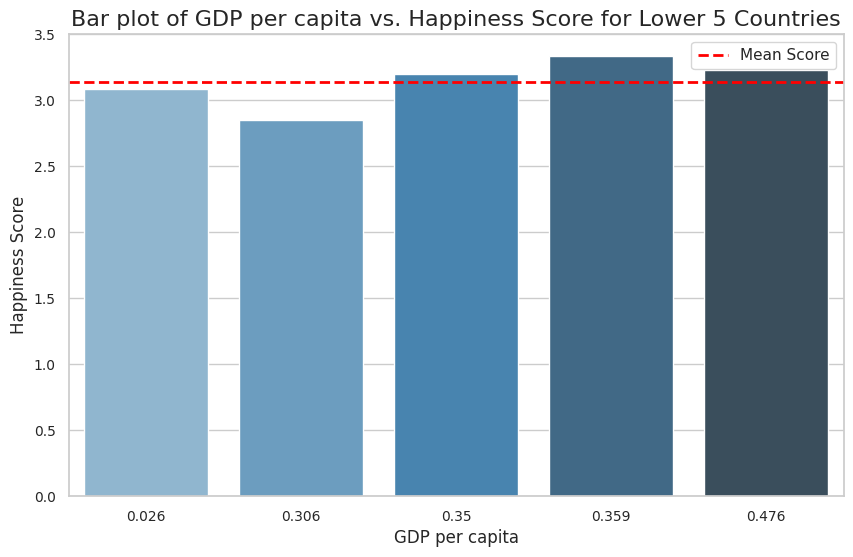

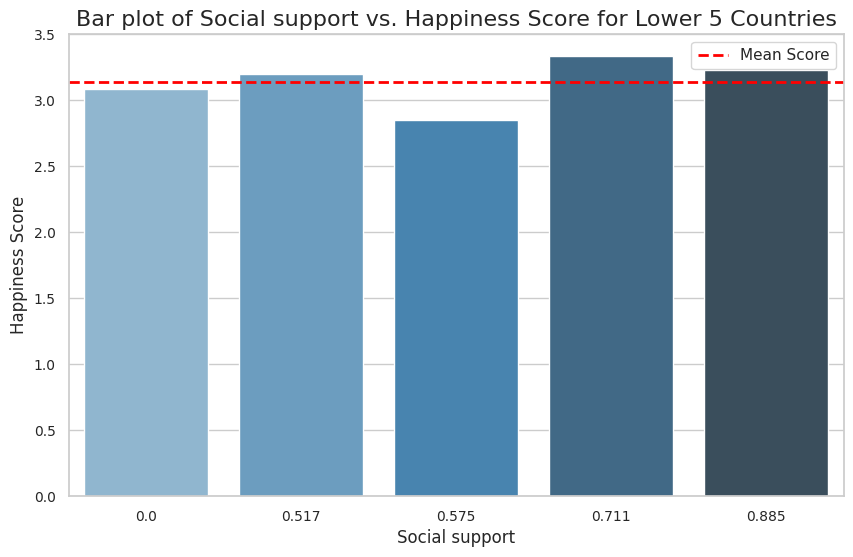

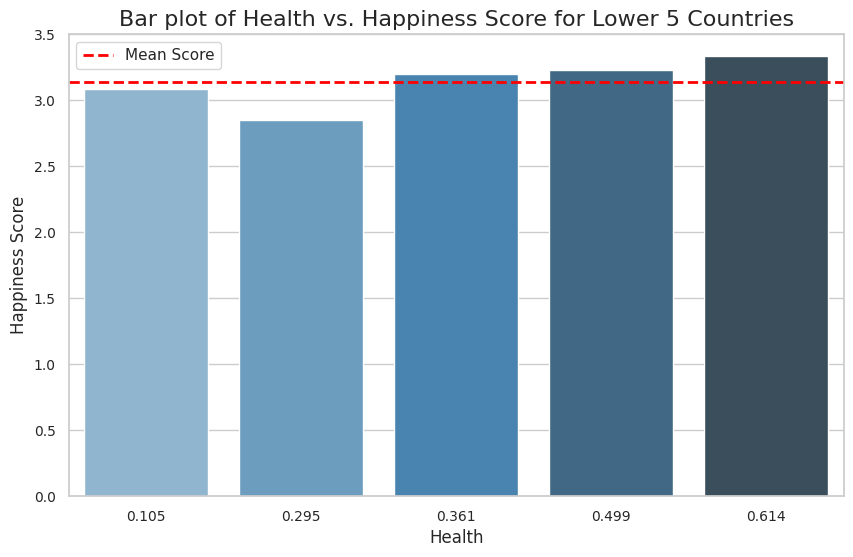

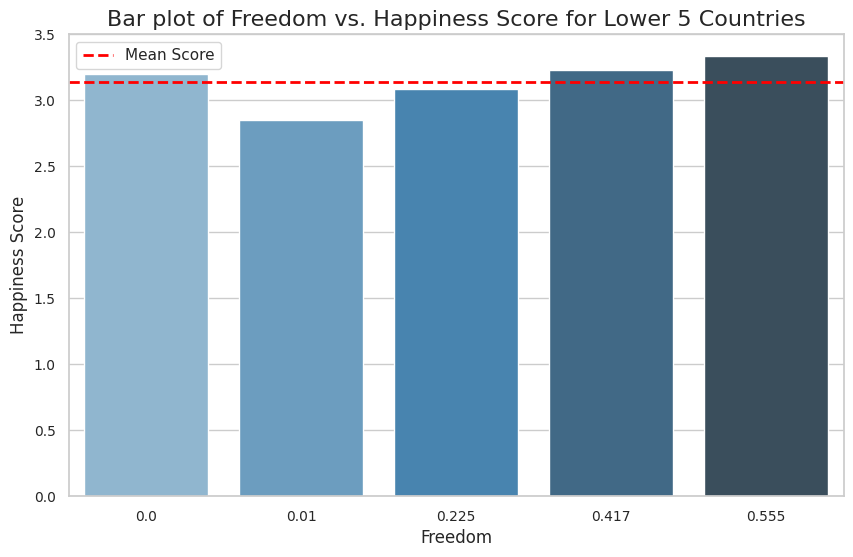

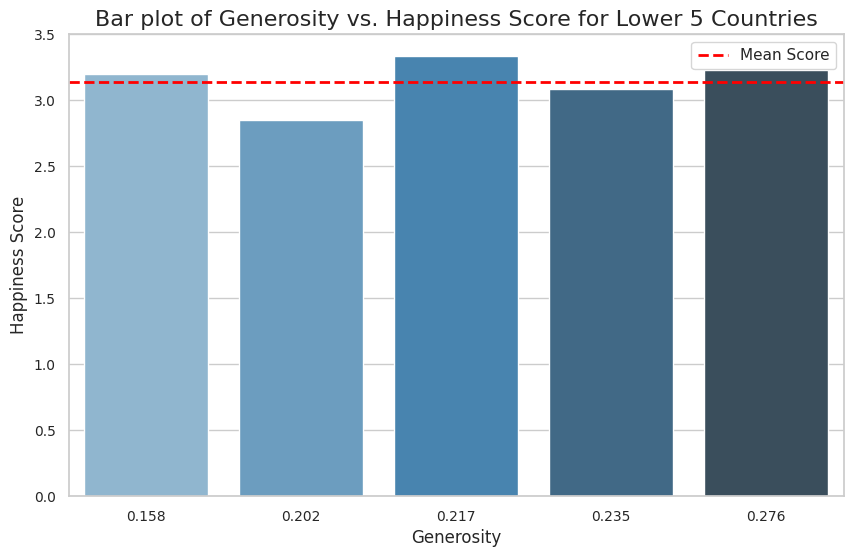

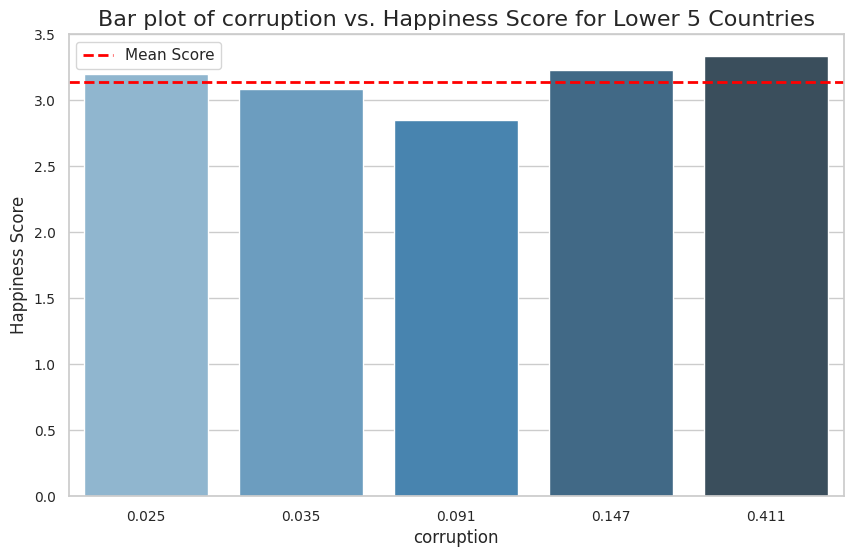

In [118]:
sns.set(style="whitegrid", palette="pastel")
columns_for_barplot = ['Score', 'GDP per capita', 'Social support', 'Health', 'Freedom', 'Generosity', 'corruption']

lower_5_countries = data_2019.sort_values(by='Score', ascending=True).head(5)
for feature in columns_for_barplot[1:]:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='Score', data=lower_5_countries, palette="Blues_d", ci=None)
    mean_score = lower_5_countries['Score'].mean()
    plt.axhline(y=mean_score, color='red', linestyle='--', linewidth=2, label='Mean Score')

    plt.title(f'Bar plot of {feature} vs. Happiness Score for Lower 5 Countries', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Happiness Score', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend()
    plt.show()


nations grappling with lower GDP often experience diminished happiness scores. Economic challenges and constrained financial resources contribute to a sense of dissatisfaction among the population.



Conversely, countries with lower social status indicators also tend to exhibit lower happiness scores. Inadequate access to education, healthcare, and disparities in income distribution can collectively impact the overall well-being of citizens, contributing to a less content populace within these nations.

In [119]:
data_2019

,Overall rank,Country,Score,GDP per capita,Social support,Health,Freedom,Generosity,corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


### Regression of Health and Score

In [120]:


df = data_2019.drop(['Overall rank', 'Country'], axis=1)
y = df['Score']
X = df['Health']


X = sm.add_constant(X)
model = sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     239.1
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           3.79e-33
Time:                        03:00:05   Log-Likelihood:                -164.48
No. Observations:                 156   AIC:                             333.0
Df Residuals:                     154   BIC:                             339.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8068      0.177     15.837      0.0

## According to the findings, the model indicates that 'Health' is an important and reliable predictor of the 'Score.' This means that the health factor has a meaningful impact on determining the overall score. Additionally, the model as a whole fits well, which is evident from the R-squared and F-statistic values. These statistics suggest that the model effectively captures and explains the variation in the data, making it a reliable tool for understanding the relationship between health and the overall score.

### Regression of GDP per capita and Score

In [121]:
filtered_data = data_2019[['GDP per capita', 'Score']].dropna()

X = sm.add_constant(filtered_data['GDP per capita'])

Y = filtered_data['Score']

model = sm.OLS(Y, X).fit()

print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     262.5
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           4.32e-35
Time:                        03:00:05   Log-Likelihood:                -159.97
No. Observations:                 156   AIC:                             323.9
Df Residuals:                     154   BIC:                             330.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.3993      0.135     25.

### This analysis suggests that there is a statistically significant positive relationship between GDP per capita and happiness scores. As GDP per capita increases, happiness scores tend to increase as well

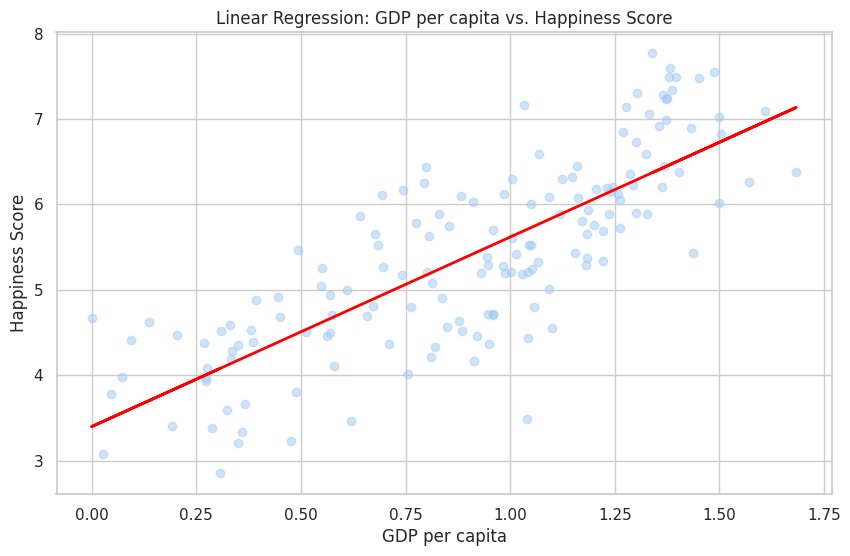

In [122]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['GDP per capita'], filtered_data['Score'], alpha=0.5)
plt.plot(filtered_data['GDP per capita'], model.predict(X), color='red', linewidth=2)
plt.title('Linear Regression: GDP per capita vs. Happiness Score')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')
plt.show()

### ALL COLUMNS

In [123]:


df = data_2019.drop(['Overall rank', 'Country'], axis=1)
y = df['Score']
X = df.drop('Score', axis=1)

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     87.62
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           2.40e-46
Time:                        03:00:05   Log-Likelihood:                -119.76
No. Observations:                 156   AIC:                             253.5
Df Residuals:                     149   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.7952      0.211      8.

### This regression model suggests that the included independent variables (GDP per capita, Social support, Health, Freedom, Generosity, and Corruption) collectively explain a significant portion of the variation in the happiness score ("Score"). However, the individual significance of "Generosity" and "Corruption" might be questionable based on their p-values.

### Histogram of Residuals

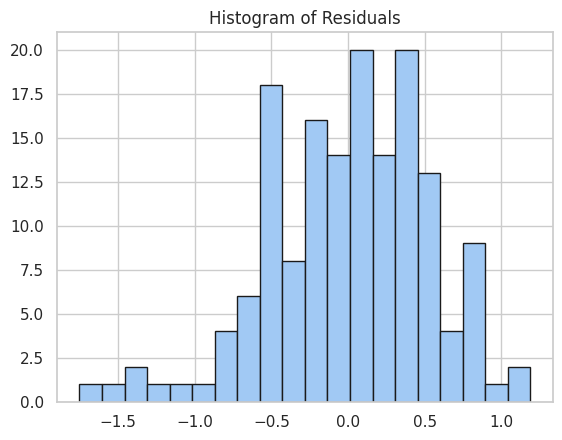

In [124]:
residuals = model.resid
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Histogram of Residuals')
plt.show()


The residual histogram in your chart shows that the residuals are approximately normally distributed with a mean of zero. This suggests that the model is a good fit for the data.

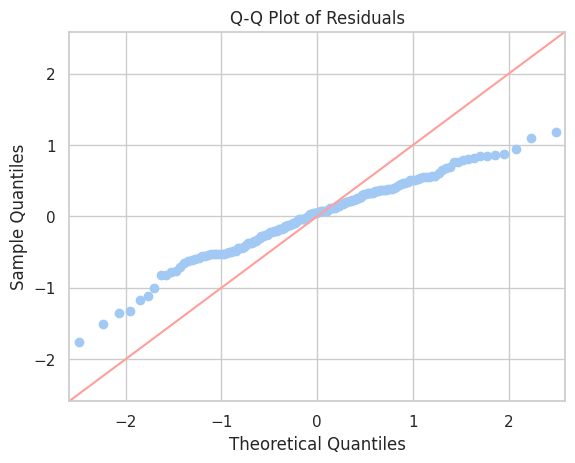

In [125]:

residuals = model.resid
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()


In this Q-Q plot, the points closely follow the diagonal line indicating that the distribution of residuals is reasonably normal. This suggests that the linear model fits the data well.

### Null Hypothesis: The effect of 'GDP per capita' on the outcome is zero.

In [126]:
#ttest
t_test_results = model.t_test(['GDP per capita', 'Social support'])
print(t_test_results)


                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.7754      0.218      3.553      0.001       0.344       1.207
c1             1.1242      0.237      4.745      0.000       0.656       1.592



### The test results suggest that both c0 and c1 are statistically significant in your regression model. The coefficients associated with these constraints are unlikely to be zero. The small p-values indicate that these constraints have a significant impact on the dependent variable.Given that the p-values for c0 and c1 are both less than the typical significance level of 0.05, you would reject the null hypotheses. The rejection of these null hypotheses suggests that the coefficients for c0 and c1 are statistically significantly different from zero, and these predictors are likely to have a significant effect on the dependent variable in your regression model.












### Durbin-Watson Test Statistic

In [127]:

dw_test_stat = sm.stats.stattools.durbin_watson(model.resid)
print(f'Durbin-Watson Test Statistic: {dw_test_stat}')


Durbin-Watson Test Statistic: 1.6483585453130485


### The Durbin-Watson test statistic is approximately 1.65. This value, being less than 2, suggests a potential positive autocorrelation in the residuals of your regression model. 

In [128]:
data_2019

,Overall rank,Country,Score,GDP per capita,Social support,Health,Freedom,Generosity,corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


### Happiness by country

In [129]:

top_countries = ['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands']


top_countries_data = data_2019[data_2019['Country'].isin(top_countries)]


print(top_countries_data[['Country', 'Score']])


       Country  Score
0      Finland  7.769
1      Denmark  7.600
2       Norway  7.554
3      Iceland  7.494
4  Netherlands  7.488


Country
Netherlands    7.488
Iceland        7.494
Norway         7.554
Denmark        7.600
Finland        7.769
Name: Score, dtype: float64


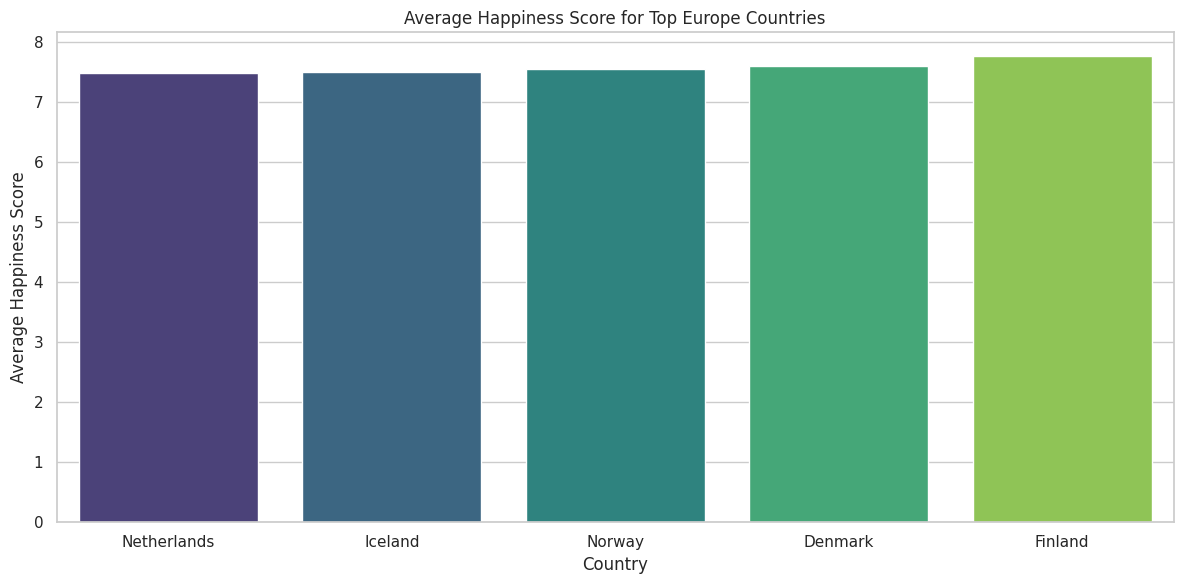

In [130]:

top_countries = ['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands']

top_countries_data = data_2019[data_2019['Country'].isin(top_countries)]


avg_happiness_top_countries = top_countries_data.groupby('Country')['Score'].mean().sort_values()

print(avg_happiness_top_countries)


sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_happiness_top_countries.index, y=avg_happiness_top_countries.values, palette='viridis')
plt.title('Average Happiness Score for Top Europe Countries')
plt.xlabel('Country')
plt.ylabel('Average Happiness Score')

plt.tight_layout()
plt.show()


In [131]:
data_2019.tail()

,Overall rank,Country,Score,GDP per capita,Social support,Health,Freedom,Generosity,corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [132]:

asian_countries = ['Sri Lanka', 'Bangladesh', 'India', 'Pakistan', 'Afghanistan']

asian_countries= data_2019[data_2019['Country'].isin(asian_countries)]

avg_happiness_asian_countries= asian_countries.groupby('Country')['Score'].mean().sort_values()

print(avg_happiness_asian_countries)



Country
Afghanistan    3.203
India          4.015
Sri Lanka      4.366
Bangladesh     4.456
Pakistan       5.653
Name: Score, dtype: float64


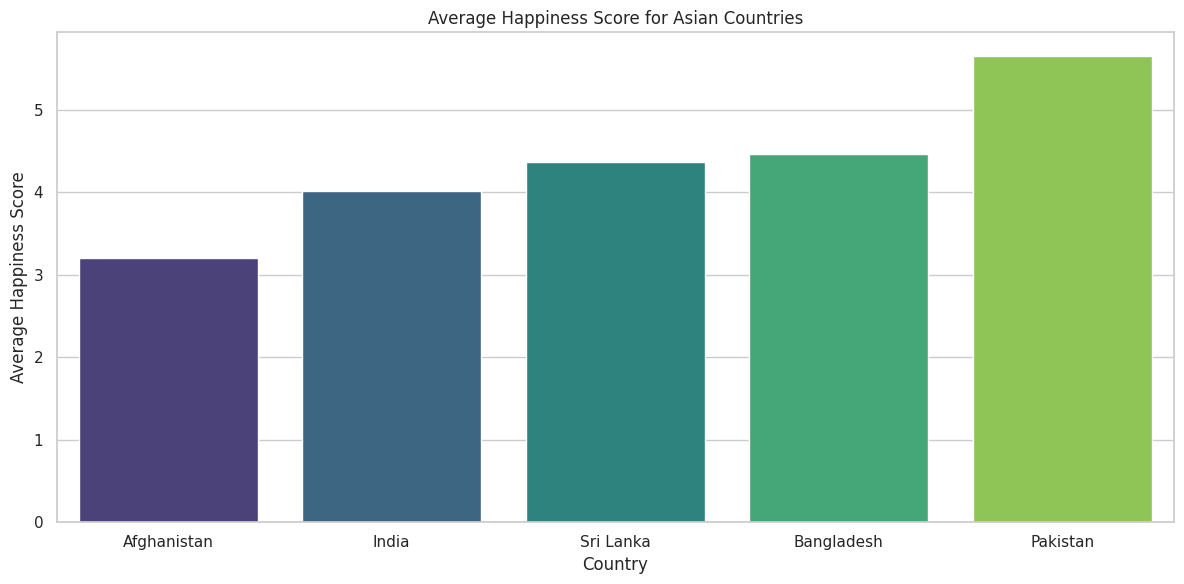

In [133]:

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_happiness_asian_countries.index, y=avg_happiness_asian_countries.values, palette='viridis')
plt.title('Average Happiness Score for Asian Countries')
plt.ylabel('Average Happiness Score')

plt.tight_layout()
plt.show()

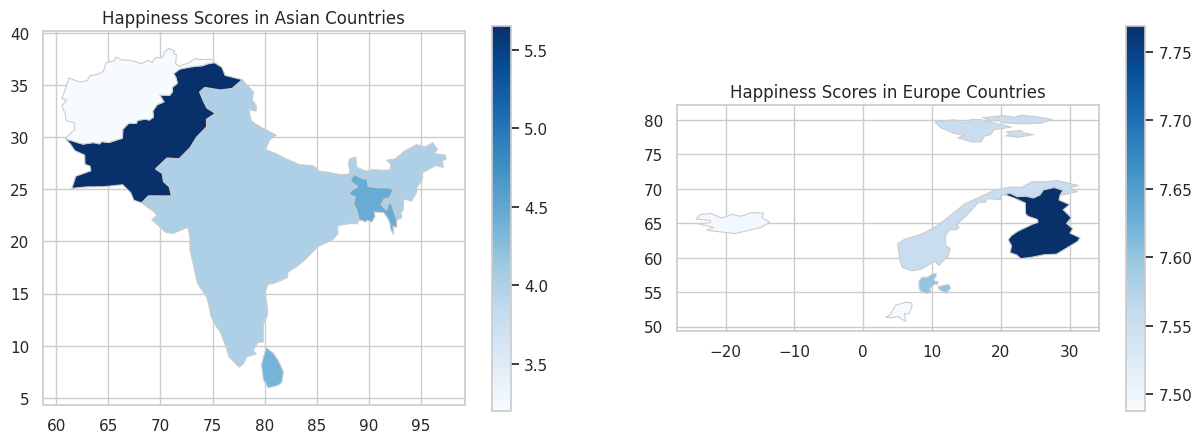

In [134]:
import geopandas as gpd
import matplotlib.pyplot as plt


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


world = world.merge(avg_happiness_asian_countries, how='left', left_on='name', right_on='Country')
world = world.merge(top_countries_data, how='left', left_on='name', right_on='Country')

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Asian countries
world.plot(column='Score_x', cmap='Blues', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=True)
ax[0].set_title('Happiness Scores in Asian Countries')

# Euro countries
world.plot(column='Score_y', cmap='Blues', linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=True)
ax[1].set_title('Happiness Scores in Europe Countries')

plt.show()


### Yes, there are geographical or regional variations in the significance of different factors in determining happiness. The main difference between the two regions is that Asians place a greater emphasis on financial security and freedom, while Europeans place a greater emphasis on community.


In [135]:
data_2019

,Overall rank,Country,Score,GDP per capita,Social support,Health,Freedom,Generosity,corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


### Machine Learning

Machine Learning (ML) regression model is employed to predict the 'Score' based on features such as 'GDP per capita', 'Social support', 'Health', and 'Freedom'. The hyperparameters of the ML model are tuned using a grid search, and the best model is evaluated using Mean Squared Error (MSE) and R-squared (R²) metrics


#### LinearRegression


In [136]:
#LinearRegression
X = df[['GDP per capita', 'Social support', 'Health', 'Freedom']]
y = df['Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.42024794847379593
R-squared: 0.5961963009874782


### GradientBoostingRegressor

In [137]:


param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}


gb_model = GradientBoostingRegressor()


grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Mean Squared Error: 0.3620533913701818
R-squared: 0.6521137123780065


## SVM Model

In [138]:


param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf', 'poly']
}
svm_model = SVR()

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Best Hyperparameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error: 0.2824629317157399
R-squared: 0.7285898073388235


### Prediction

Prediction: 5.673166692727373


The best_model (previously tuned SVM regression model) is trained on the training data (X_train and y_train).
A new set of sample data (new_sample_data) representing features 'GDP per capita', 'Social support', 'Health', and 'Freedom' is created.
The new sample data is reshaped to fit the model's input requirements.
The trained model is used to predict the 'Score' for the new sample.
The predicted 'Score' for the new sample is printed.

## Abstract
### This report explores the factors influencing happiness scores across countries, utilizing statistical analyses, scatter plots, and regression models. Key findings reveal strong positive correlations between GDP per capita, social support, healthy life expectancy, and freedom to make life choices with happiness scores. Meanwhile, generosity and perceptions of corruption exhibit weaker connections. Scatter plots illustrate the relationships visually, highlighting nuances beyond the identified correlations. The top and bottom five countries' comparisons emphasize the impact of GDP and social status on happiness. Regression analyses confirm health and GDP as significant predictors, while combining all factors explains variations in happiness scores. Geographical variations in priorities are evident between Asian and European countries. Lastly, machine learning models, including Linear Regression, GradientBoostingRegressor, and SVM, provide predictive insights. The report concludes with the application of these models to new sample data, showcasing their ability to estimate happiness scores based on key features.





